In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os

In [2]:
# Path to your dataset (update this if needed)
DATASET_DIR = r"attempt2\archive\Indian Food Images"

IMG_SIZE = 224
BATCH_SIZE = 32

In [3]:
# Data generators with training/validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 3200 images belonging to 80 classes.
Found 800 images belonging to 80 classes.


In [4]:
# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

In [5]:
# Freeze all layers in base model
for layer in base_model.layers:
    layer.trainable = False

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

C:\Users\HOME\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.0748 - loss: 4.1865 - val_accuracy: 0.2962 - val_loss: 2.7825
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.4349 - loss: 2.2735 - val_accuracy: 0.4412 - val_loss: 2.1211
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6447 - loss: 1.3638 - val_accuracy: 0.4812 - val_loss: 1.9138
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.7779 - loss: 0.9647 - val_accuracy: 0.4863 - val_loss: 1.8586
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8376 - loss: 0.6885 - val_accuracy: 0.5013 - val_loss: 1.7755
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9100 - loss: 0.5023 - val_accuracy: 0.5375 - val_loss: 1.7473
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9523 - loss: 0.3406 - val_accuracy: 0.5387 - val_loss: 1.7539
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9699 - loss: 0.2483 - val_accu

In [8]:
import cv2
import numpy as np
def preprocess_image_opencv(image_path):
    img = cv2.imread(image_path)  # Loads in BGR format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype("float32") / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)
    return img


In [9]:
# Get class names from the generator
class_names = list(train_generator.class_indices.keys())

# Save class names to a file
with open("class_names.txt", "w") as f:
    for name in class_names:
        f.write(f"{name}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


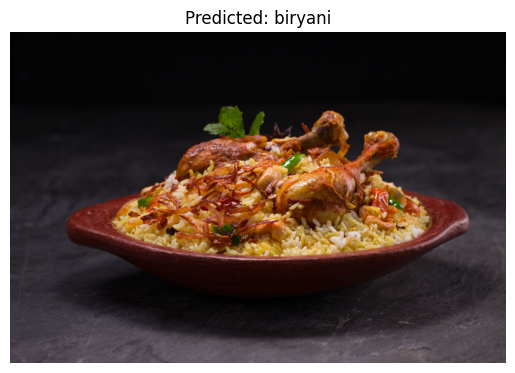

In [19]:
import matplotlib.pyplot as plt
from PIL import Image
# 🔍 Predict and show results
# Load class names
with open("class_names.txt", "r") as f:
    class_names = [line.strip() for line in f.readlines()]

test_image_path = "biryani.jpg"  # Replace with your image path

# Preprocess and predict
img_array = preprocess_image_opencv(test_image_path)
pred = model.predict(img_array)
pred_label = np.argmax(pred, axis=1)[0]
pred_class = class_names[pred_label]

# 🖼️ Display image with prediction
plt.imshow(Image.open(test_image_path))
plt.title(f"Predicted: {pred_class}")
plt.axis("off")
plt.show()


In [20]:
# Save the trained model
model.save("indian_food_classifier_mobilenetv2acc97.h5")

